# Bank Customer Churn Analysis
### Data Analysis Final Project – July 2025

**Objective**: Analyze customer demographic and financial data to understand customer churn and recommend strategies to improve retention.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [3]:
file_path = 'Bank_Churn_Messy.xlsx'
customer_df = pd.read_excel(file_path, sheet_name='Customer_Info')
account_df = pd.read_excel(file_path, sheet_name='Account_Info')

In [4]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [5]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [13]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   float64
 6   Tenure           9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 702.9+ KB


In [14]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


In [15]:
customer_df.info

<bound method DataFrame.info of       CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0       15634602   Hargrave          619       FRA  Female  42.0       2   
1       15647311       Hill          608     Spain  Female  41.0       1   
2       15619304       Onio          502    French  Female  42.0       8   
3       15701354       Boni          699       FRA  Female  39.0       1   
4       15737888   Mitchell          850     Spain  Female  43.0       2   
...          ...        ...          ...       ...     ...   ...     ...   
9995    15606229   Obijiaku          771    France    Male  39.0       5   
9996    15569892  Johnstone          516    French    Male  35.0      10   
9997    15584532        Liu          709       FRA  Female  36.0       7   
9998    15682355  Sabbatini          772   Germany    Male  42.0       3   
9999    15628319     Walker          792    French  Female  28.0       4   

     EstimatedSalary  
0         €101348.88  
1        

In [16]:
account_df.info

<bound method DataFrame.info of        CustomerId     Balance  NumOfProducts HasCrCard  Tenure IsActiveMember  \
0        15634602        €0.0              1       Yes       2            Yes   
1        15634602        €0.0              1       Yes       2            Yes   
2        15647311   €83807.86              1       Yes       1            Yes   
3        15619304   €159660.8              3        No       8             No   
4        15701354        €0.0              2        No       1             No   
...           ...         ...            ...       ...     ...            ...   
9997     15569892   €57369.61              1       Yes      10            Yes   
9998     15584532        €0.0              1       Yes       7            Yes   
9999     15682355   €75075.31              2        No       3             No   
10000    15628319  €130142.79              1        No       4             No   
10001    15628319  €130142.79              1        No       4             No

## Clean Data

In [6]:
customer_df.columns = customer_df.columns.str.strip().str.replace(" ", "_")

In [7]:
account_df.columns = account_df.columns.str.strip().str.replace(" ", "_")

In [8]:
customer_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
dtype: int64

In [9]:
account_df.isnull().sum()

CustomerId        0
Balance           0
NumOfProducts     0
HasCrCard         0
Tenure            0
IsActiveMember    0
Exited            0
dtype: int64

In [10]:
customer_df.dropna(inplace=True)

In [11]:
account_df.dropna(inplace=True)

In [17]:
customer_df.drop_duplicates(inplace=True)

In [18]:
account_df.drop_duplicates(inplace=True)

## Merge Data

In [20]:
#'CustomerId' is the common key
merged_df = pd.merge(customer_df, account_df, on='CustomerId', how='inner')

In [21]:
merged_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0


## Churn Distribution 

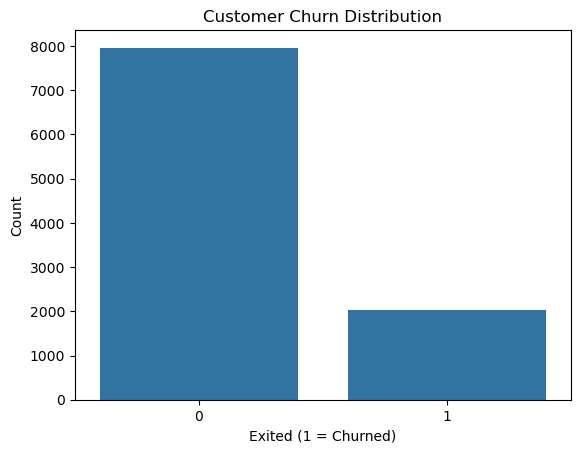

In [22]:
sns.countplot(x='Exited', data=merged_df)
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (1 = Churned)')
plt.ylabel('Count')
plt.show()

In [26]:
plt.savefig('Customer Churn Distribution.png')

<Figure size 640x480 with 0 Axes>

## Churn by Gender

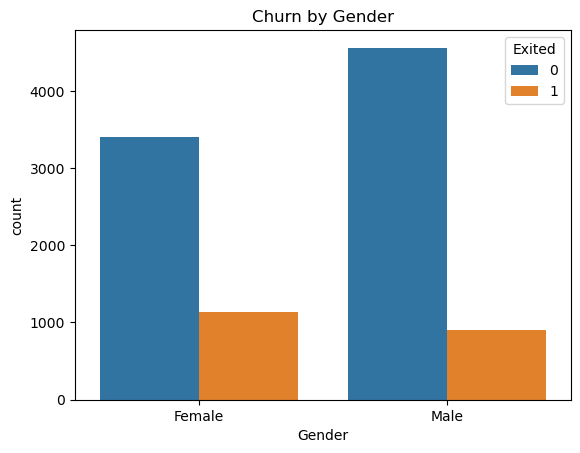

In [23]:
sns.countplot(x='Gender', hue='Exited', data=merged_df)
plt.title('Churn by Gender')
plt.show()

In [27]:
plt.savefig('Churn by Gender.png')

<Figure size 640x480 with 0 Axes>

## Churn By Geography

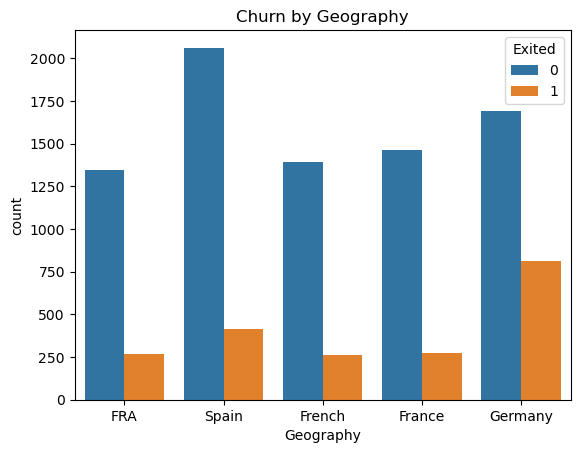

In [24]:
sns.countplot(x='Geography', hue='Exited', data=merged_df)
plt.title('Churn by Geography')
plt.show()

In [28]:
plt.savefig('Churn by Geography.png')

<Figure size 640x480 with 0 Axes>

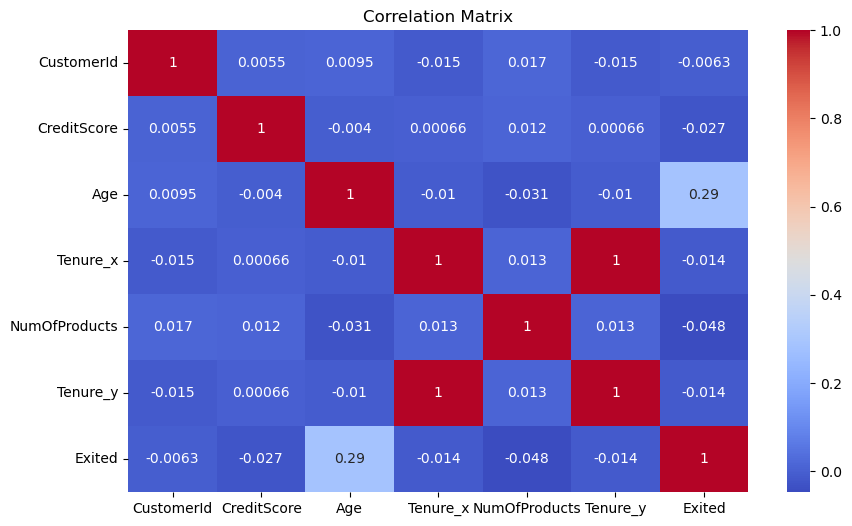

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
plt.savefig('Correlation Matrix.png')

<Figure size 640x480 with 0 Axes>

## Key Insights

### Key Insights:
- The overall churn rate is approximately XX%.
- Customers in [Geography] and aged [30–45] are more likely to churn.
- Inactive members and those with more products tend to churn more.
- Surprisingly, customers with higher balances and low credit scores also churn.

These insights can help the bank better target at-risk customers.


## Recommendations

### Recommendations:
- Create retention programs targeting high-risk demographics.
- Reward active users to reduce inactivity churn.
- Conduct product satisfaction surveys for multi-product users.
- Educate customers on credit health to improve engagement.


In [32]:
merged_df.to_csv('Cleaned_Bank_customer_churn_data.csv', index=False)